In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data loading and preprocessing
data = pd.read_csv('../data/Sample_Superstore.csv', on_bad_lines='skip')
# data = data.dropna()
data['Combined_Category'] = data['Category'].astype(str) + '-' + data['Sub-Category'].astype(str)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Combined_Category
0,1,CA-2021-152156,2021/11/8,2021/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Furniture-Bookcases
1,2,CA-2021-152156,2021/11/8,2021/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Furniture-Chairs
2,3,CA-2021-138688,2021/6/12,2021/6/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Office Supplies-Labels
3,4,US-2020-108966,2020/10/11,2020/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Furniture-Tables
4,5,US-2020-108966,2020/10/11,2020/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Office Supplies-Storage


In [3]:
print(set(data['Ship Mode']))
print(set(data['Segment']))
print(set(data['Region']))
print("States:",len(set(data['State'])))
print("Cities:",len(set(data['City'])))
# print(set(data['Category']))
# print(set(data['Sub-Category']))
print(set(data['Combined_Category']))
data.columns

{'Second Class', 'Same Day', 'Standard Class', 'First Class'}
{'Consumer', 'Home Office', 'Corporate'}
{'Central', 'North', 'East', 'South', 'West'}
States: 207
Cities: 2152
{'Technology-Machines', 'Furniture-Bookcases', 'Technology-Accessories', 'Office Supplies-Fasteners', 'Technology-Copiers', 'Technology-Phones', 'Furniture-Chairs', 'Furniture-Furnishings', 'Office Supplies-Art', 'Office Supplies-Envelopes', 'Office Supplies-Paper', 'Office Supplies-Storage', 'Office Supplies-Labels', 'Furniture-Tables', 'Office Supplies-Binders', 'Office Supplies-Appliances', 'Office Supplies-Supplies'}


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Combined_Category'],
      dtype='object')

In [4]:
# Assume we are going to analysis the item which has 'combined_category' as 'Furniture-Bookcases'

# filter the data
y1 = 'Furniture-Bookcases'
# try to create a folder to save the analysis result
import os
if not os.path.exists('./analysis_result_{}'.format(y1)):
    os.makedirs('./analysis_result_{}'.format(y1))
data = data[data['Combined_Category'] == y1]

# analyze the segment distribution and save in dictionary in both number and percentage
segment_distribution = data['Segment'].value_counts().to_dict()
segment_distribution = {k: (v, round(v / len(data), 2)) for k, v in segment_distribution.items()}
print("The segment distribution of item '{}' is: {}".format(y1, segment_distribution))

# analyze the difference of average quantity between the segment, round to 2 decimal
segment_quantity = data.groupby('Segment')['Quantity'].mean().to_dict()
segment_quantity = {k: round(v, 2) for k, v in segment_quantity.items()}
print("The average quantity of item bought by each segment is: {}".format(segment_quantity))

# analyze the average unit price; profit; discount of each segment, round to 2 decimal
# unit price = sales / quantity
segment_unit_price = data.groupby('Segment')['Sales'].sum() / data.groupby('Segment')['Quantity'].sum()
segment_unit_price = segment_unit_price.to_dict()
segment_unit_price = {k: round(v, 2) for k, v in segment_unit_price.items()}
print("The average unit price of item bought by each segment is: {}".format(segment_unit_price))
# also draw the curve plot by pyplot of unit price along the order-date
# data['Order Date'] = pd.to_datetime(data['Order Date'])
# data_sort_by_date = data.sort_values(by='Order Date')
# plt.plot(data_sort_by_date['Order Date'], data_sort_by_date['Sales'] / data_sort_by_date['Quantity'])
# plt.xlabel('Order Date')
# plt.ylabel('Unit Price')
# plt.title('Unit Price of item {} along the order date'.format(y1))
# plt.show()

# mean profit = profit / quantity
segment_profit = data.groupby('Segment')['Profit'].sum() / data.groupby('Segment')['Quantity'].sum()
segment_profit = segment_profit.to_dict()
segment_profit = {k: round(v, 2) for k, v in segment_profit.items()}
print("The average profit of item bought by each segment is: {}".format(segment_profit))

# discount
segment_discount = data.groupby('Segment')['Discount'].mean()
segment_discount = segment_discount.to_dict()
segment_discount = {k: round(v, 2) for k, v in segment_discount.items()}
print("The average discount of item bought by each segment is: {}".format(segment_discount))

# analyze the region distribution and save in dictionary in both number and percentage
region_distribution = data['Region'].value_counts().to_dict()
region_distribution = {k: (v, round(v / len(data), 2)) for k, v in region_distribution.items()}
print("The region distribution of item '{}' is: {}".format(y1, region_distribution))

# analyze the Ship Mode distribution and save in dictionary in both number and percentage
ship_mode_distribution = data['Ship Mode'].value_counts().to_dict()
ship_mode_distribution = {k: (v, round(v / len(data), 2)) for k, v in ship_mode_distribution.items()}
print("The Ship Mode distribution of item '{}' is: {}".format(y1, ship_mode_distribution))

# analyze the Ship Speed distribution and save in dictionary in both number and percentage
# ship speed = ship date - order date
data['Ship Date'] = pd.to_datetime(data['Ship Date'])
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Speed'] = data['Ship Date'] - data['Order Date']
data['Ship Speed'] = data['Ship Speed'].dt.days
ship_speed_distribution = data['Ship Speed'].value_counts().to_dict()
ship_speed_distribution = {k: (v, round(v / len(data), 2)) for k, v in ship_speed_distribution.items()}
# sort by keys
ship_speed_distribution = dict(sorted(ship_speed_distribution.items()))
print("The Ship Days distribution of item '{}' is: {}".format(y1, ship_speed_distribution))

The segment distribution of item 'Furniture-Bookcases' is: {'Consumer': (834, 0.51), 'Corporate': (517, 0.32), 'Home Office': (289, 0.18)}
The average quantity of item bought by each segment is: {'Consumer': 3.86, 'Corporate': 3.75, 'Home Office': 3.94}
The average unit price of item bought by each segment is: {'Consumer': 163.68, 'Corporate': 159.45, 'Home Office': 157.53}
The average profit of item bought by each segment is: {'Consumer': 21.38, 'Corporate': 23.2, 'Home Office': 18.1}
The average discount of item bought by each segment is: {'Consumer': 0.14, 'Corporate': 0.13, 'Home Office': 0.13}
The region distribution of item 'Furniture-Bookcases' is: {'Central': (461, 0.28), 'East': (357, 0.22), 'South': (330, 0.2), 'North': (325, 0.2), 'West': (167, 0.1)}
The Ship Mode distribution of item 'Furniture-Bookcases' is: {'Standard Class': (949, 0.58), 'Second Class': (359, 0.22), 'First Class': (253, 0.15), 'Same Day': (79, 0.05)}
The Ship Days distribution of item 'Furniture-Bookcase

In [5]:
## Rgion level analysis
# analyze the average quantity; sale; unit price; profit; discount; gross profit of each region, round to 2 decimal
region_quantity = data.groupby('Region')['Quantity'].mean()
region_quantity = region_quantity.to_dict()
region_quantity = {k: round(v, 2) for k, v in region_quantity.items()}

region_sales = data.groupby('Region')['Sales'].mean()
region_sales = region_sales.to_dict()
region_sales = {k: round(v, 2) for k, v in region_sales.items()}

region_unit_price = data.groupby('Region')['Sales'].sum() / data.groupby('Region')['Quantity'].sum()
region_unit_price = region_unit_price.to_dict()
region_unit_price = {k: round(v, 2) for k, v in region_unit_price.items()}

region_discount = data.groupby('Region')['Discount'].mean()
region_discount = region_discount.to_dict()
region_discount = {k: round(v, 2) for k, v in region_discount.items()}

region_profit = data.groupby('Region')['Profit'].sum() / data.groupby('Region')['Quantity'].sum()
region_profit = region_profit.to_dict()
region_profit = {k: round(v, 2) for k, v in region_profit.items()}

region_gross_profit = data.groupby('Region')['Profit'].sum() / data.groupby('Region')['Sales'].sum()
region_gross_profit = region_gross_profit.to_dict()
region_gross_profit = {k: round(v, 2) for k, v in region_gross_profit.items()}

print("The average quantity of item of each region is: {}".format(region_quantity))
print("The average sales of item of each region is: {}".format(region_sales))
print("The average unit price of item of each region is: {}".format(region_unit_price))
print("The average discount of item of each region is: {}".format(region_discount))
print("The average profit of item of each region is: {}".format(region_profit))
print("The average gross profit of item of each region is: {}".format(region_gross_profit))

The average quantity of item of each region is: {'Central': 3.69, 'East': 3.93, 'North': 3.96, 'South': 3.77, 'West': 3.96}
The average sales of item of each region is: {'Central': 686.13, 'East': 537.2, 'North': 648.24, 'South': 646.98, 'West': 495.4}
The average unit price of item of each region is: {'Central': 186.06, 'East': 136.79, 'North': 163.7, 'South': 171.63, 'West': 125.16}
The average discount of item of each region is: {'Central': 0.14, 'East': 0.16, 'North': 0.11, 'South': 0.08, 'West': 0.21}
The average profit of item of each region is: {'Central': 19.95, 'East': 12.6, 'North': 28.66, 'South': 33.92, 'West': 5.58}
The average gross profit of item of each region is: {'Central': 0.11, 'East': 0.09, 'North': 0.18, 'South': 0.2, 'West': 0.04}


In [6]:
## Country level analysis
# analyze the country distribution and save in dictionary in both number and percentage
country_distribution = data['Country'].value_counts().to_dict()
country_distribution = {k: (v, round(v / len(data), 2)) for k, v in country_distribution.items()}
print("The country distribution of item '{}' is: {}".format(y1, country_distribution))

# analyze the average quantity; sale; unit price; profit; gross profit of each country, round to 2 decimal, list the top 10 countries 
country_quantity = data.groupby('Country')['Quantity'].mean().to_dict()
country_quantity = {k: round(v, 2) for k, v in country_quantity.items()}
country_quantity = dict(sorted(country_quantity.items(), key=lambda x: x[1], reverse=True))
country_quantity_top_10 = dict(list(country_quantity.items())[:10])

country_sales = data.groupby('Country')['Sales'].mean().to_dict()
country_sales = {k: round(v, 2) for k, v in country_sales.items()}
country_sales = dict(sorted(country_sales.items(), key=lambda x: x[1], reverse=True))
country_sales_top_10 = dict(list(country_sales.items())[:10])

country_unit_price = data.groupby('Country')['Sales'].sum() / data.groupby('Country')['Quantity'].sum()
country_unit_price = country_unit_price.to_dict()
country_unit_price = {k: round(v, 2) for k, v in country_unit_price.items()}
country_unit_price = dict(sorted(country_unit_price.items(), key=lambda x: x[1], reverse=True))
country_unit_price_top_10 = dict(list(country_unit_price.items())[:10])

country_profit = data.groupby('Country')['Profit'].sum() / data.groupby('Country')['Quantity'].sum()
country_profit = country_profit.to_dict()
country_profit = {k: round(v, 2) for k, v in country_profit.items()}
country_profit = dict(sorted(country_profit.items(), key=lambda x: x[1], reverse=True))
country_profit_top_10 = dict(list(country_profit.items())[:10])

country_gross_profit = data.groupby('Country')['Profit'].sum() / data.groupby('Country')['Sales'].sum()
country_gross_profit = country_gross_profit.to_dict()
country_gross_profit = {k: round(v, 2) for k, v in country_gross_profit.items()}
country_gross_profit = dict(sorted(country_gross_profit.items(), key=lambda x: x[1], reverse=True))
country_gross_profit_top_10 = dict(list(country_gross_profit.items())[:10])

print("The top 10 countries with highest average quantity of item is: {}".format(country_quantity_top_10))
print("The top 10 countries with highest average sales of item is: {}".format(country_sales_top_10))
print("The top 10 countries with highest average unit price of item is: {}".format(country_unit_price_top_10))
print("The top 10 countries with highest average profit of item is: {}".format(country_profit_top_10))
print("The top 10 countries with highest average gross profit of item is: {}".format(country_gross_profit_top_10))

The country distribution of item 'Furniture-Bookcases' is: {'China': (928, 0.57), 'United States': (228, 0.14), 'France': (132, 0.08), 'Germany': (97, 0.06), 'United Kingdom': (84, 0.05), 'Italy': (50, 0.03), 'Spain': (49, 0.03), 'Netherlands': (26, 0.02), 'Austria': (10, 0.01), 'Sweden': (10, 0.01), 'Belgium': (8, 0.0), 'Finland': (6, 0.0), 'Ireland': (4, 0.0), 'Portugal': (3, 0.0), 'Switzerland': (3, 0.0), 'Norway': (2, 0.0)}
The top 10 countries with highest average quantity of item is: {'Norway': 5.0, 'Netherlands': 4.23, 'Ireland': 4.0, 'Sweden': 4.0, 'China': 3.92, 'Italy': 3.82, 'United Kingdom': 3.82, 'United States': 3.81, 'Austria': 3.8, 'France': 3.67}
The top 10 countries with highest average sales of item is: {'Austria': 1136.17, 'Italy': 933.37, 'United Kingdom': 914.92, 'Spain': 908.74, 'France': 794.26, 'Germany': 786.36, 'Finland': 766.93, 'Norway': 758.85, 'Portugal': 702.19, 'Belgium': 671.06}
The top 10 countries with highest average unit price of item is: {'Austria

In [7]:
## discount analysis
# divide the discount into 6 group based on the value: 0, 10%-20%, 20%-30%, 30%-40%, 40%-50%, >50%, match the label to the group
def discount_group(discount):
    if discount == 0:
        return '0'
    elif 0.1 <= discount < 0.2:
        return '10%-20%'   
    elif 0.2 <= discount < 0.3:
        return '20%-30%'
    elif 0.3 <= discount < 0.4:
        return '30%-40%'
    elif 0.4 <= discount < 0.5:
        return '40%-50%'
    else:
        return '>=50%'

data['Discount_Group'] = data['Discount'].apply(discount_group)

# analyze the discount distribution and save in dictionary
discount_distribution = data['Discount_Group'].value_counts().to_dict()
discount_distribution = {k: (v, round(v / len(data), 2)) for k, v in discount_distribution.items()}
print("The discount distribution of item '{}' is: {}".format(y1, discount_distribution))

# analyze the percentage of discount group in each segement, save in dictionary in both number and percentage
segment_discount_distribution = data.groupby('Segment')['Discount_Group'].value_counts().unstack().T
segment_discount_distribution = segment_discount_distribution.fillna(0).astype(int).to_dict()
segment_discount_distribution_percentage = {}
for k, v in segment_discount_distribution.items():
    total = sum(v.values())
    v_percentage = {kk: (vv, round(vv / total, 2)) for kk, vv in v.items()}
    segment_discount_distribution_percentage[k] = v_percentage
print("The discount distribution of item '{}' in each segment is: {}".format(y1, segment_discount_distribution_percentage))

# analyze the average quantity; sale; profit; unit price; gross profit of each discount group, round to 2 decimal
discount_quantity = data.groupby('Discount_Group')['Quantity'].mean().to_dict()
discount_quantity = {k: round(v, 2) for k, v in discount_quantity.items()}
discount_sales = data.groupby('Discount_Group')['Sales'].mean().to_dict()
discount_sales = {k: round(v, 2) for k, v in discount_sales.items()}
discount_profit = data.groupby('Discount_Group')['Profit'].mean().to_dict()
discount_profit = {k: round(v, 2) for k, v in discount_profit.items()}
discount_unit_price = data.groupby('Discount_Group')['Sales'].sum() / data.groupby('Discount_Group')['Quantity'].sum()
discount_unit_price = discount_unit_price.to_dict()
discount_unit_price = {k: round(v, 2) for k, v in discount_unit_price.items()}
discount_gross_profit = data.groupby('Discount_Group')['Profit'].sum() / data.groupby('Discount_Group')['Sales'].sum()
discount_gross_profit = discount_gross_profit.to_dict()
discount_gross_profit = {k: round(v, 2) for k, v in discount_gross_profit.items()}

print("The average quantity of item of each discount group is: {}".format(discount_quantity))
print("The average sales of item of each discount group is: {}".format(discount_sales))
print("The average profit of item of each discount group is: {}".format(discount_profit))
print("The average unit price of item of each discount group is: {}".format(discount_unit_price))
print("The average gross profit of item of each discount group is: {}".format(discount_gross_profit))

The discount distribution of item 'Furniture-Bookcases' is: {'0': (896, 0.55), '40%-50%': (286, 0.17), '10%-20%': (276, 0.17), '>=50%': (93, 0.06), '20%-30%': (52, 0.03), '30%-40%': (37, 0.02)}
The discount distribution of item 'Furniture-Bookcases' in each segment is: {'Consumer': {'0': (445, 0.53), '10%-20%': (145, 0.17), '20%-30%': (34, 0.04), '30%-40%': (20, 0.02), '40%-50%': (134, 0.16), '>=50%': (56, 0.07)}, 'Corporate': {'0': (291, 0.56), '10%-20%': (85, 0.16), '20%-30%': (9, 0.02), '30%-40%': (12, 0.02), '40%-50%': (96, 0.19), '>=50%': (24, 0.05)}, 'Home Office': {'0': (160, 0.55), '10%-20%': (46, 0.16), '20%-30%': (9, 0.03), '30%-40%': (5, 0.02), '40%-50%': (56, 0.19), '>=50%': (13, 0.04)}}
The average quantity of item of each discount group is: {'0': 3.86, '10%-20%': 3.69, '20%-30%': 3.77, '30%-40%': 4.0, '40%-50%': 3.81, '>=50%': 4.09}
The average sales of item of each discount group is: {'0': 675.12, '10%-20%': 779.38, '20%-30%': 616.23, '30%-40%': 507.46, '40%-50%': 351.6,

In [8]:
data[data['Combined_Category'] == y1].head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Combined_Category,Ship Speed,Discount_Group
0,1,CA-2021-152156,2021-11-08,2021-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Furniture-Bookcases,3,0
27,28,US-2020-150630,2020-09-17,2020-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,Furniture-Bookcases,4,>=50%
38,39,CA-2020-117415,2020-12-27,2020-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.3992,3,0.32,-46.9764,Furniture-Bookcases,4,30%-40%
189,190,CA-2020-102281,2020-10-12,2020-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",899.1360,4,0.20,112.3920,Furniture-Bookcases,2,20%-30%
192,193,CA-2020-102281,2020-10-12,2020-10-14,First Class,MP-17470,Mark Packer,Home Office,United States,New York City,...,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",626.3520,3,0.20,46.9764,Furniture-Bookcases,2,20%-30%


In [9]:
### Time
# filter the data
#Quantity
# Extract quarterly information
data['Quarter'] = data['Order Date'].dt.quarter
# Quarterly sales statistics
# Map quarter to season name
quarter_map = {1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'}

seasonal_quantity = data.groupby(['Quarter'])['Quantity'].sum()
seasonal_quantity = seasonal_quantity.to_dict()
seasonal_quantity = {quarter_map[k]: round(v, 2) for k, v in seasonal_quantity.items()}
print("The sum quantity of each season by {} is: {}".format(y1,seasonal_quantity))

# Extract year and quarter information
data['Year'] = data['Order Date'].dt.year
# Statistics of sales by year and quarter
year_seasonal_quantity = data.groupby(['Year','Quarter'])['Quantity'].sum()
year_seasonal_quantity = year_seasonal_quantity.to_dict()
year_seasonal_quantity = {f"{k[0]}{quarter_map[k[1]]}": round(v, 2) for k, v in year_seasonal_quantity.items()}
print("The sum quantity of each season each year by {} is: {}".format(y1,year_seasonal_quantity))

#Sales
# Calculate the total sales revenue by quarter
seasonal_sales = data.groupby(['Quarter'])['Sales'].sum()
seasonal_sales = seasonal_sales.to_dict()
seasonal_sales = {quarter_map[k]: round(v, 2) for k, v in seasonal_sales.items()}
print("The sum sales of each season by {} is: {}".format(y1,seasonal_sales))

# Statistics of sales by year and quarter
year_seasonal_sales = data.groupby(['Year','Quarter'])['Sales'].sum()
year_seasonal_sales = year_seasonal_sales.to_dict()
year_seasonal_sales = {f"{k[0]}{quarter_map[k[1]]}": round(v, 2) for k, v in year_seasonal_sales.items()}
print("The sum sales of each season each year by {} is: {}".format(y1,year_seasonal_sales))

#Quarterly sales/sales ratio
data['Sales_Ratio'] = data['Sales'] / data['Quantity']

# View the ratio of sales volume to sales volume by quarter
sales_ratio_by_quarter = data.groupby(['Quarter'])['Sales_Ratio'].mean()
sales_ratio_by_quarter = sales_ratio_by_quarter.to_dict()
sales_ratio_by_quarter = {quarter_map[k]: round(v, 2) for k, v in sales_ratio_by_quarter.items()}
print("The sales ratio by quarter season of {} is: {}".format(y1,sales_ratio_by_quarter))

#profit
seasonal_profit = data.groupby(['Quarter'])['Profit'].sum()
seasonal_profit = seasonal_profit.to_dict()
seasonal_profit = {quarter_map[k]: round(v, 2) for k, v in seasonal_profit.items()}
print("The sum profit of each season by {} is: {}".format(y1,seasonal_profit))

year_seasonal_profit = data.groupby(['Year','Quarter'])['Profit'].sum()
year_seasonal_profit = year_seasonal_profit.to_dict()
year_seasonal_profit = {f"{k[0]}{quarter_map[k[1]]}": round(v, 2) for k, v in year_seasonal_profit.items()}
print("The sum profit of each season each year by {} is: {}".format(y1,year_seasonal_profit))

#profit/sales
data['RIO'] = data['Profit'] / data['Sales']
seasonal_RIO = data.groupby(['Quarter'])['RIO'].sum()
seasonal_RIO = seasonal_RIO.to_dict()
seasonal_RIO = {quarter_map[k]: round(v, 2) for k, v in seasonal_RIO.items()}
print("The RIO of each season by {} is: {}".format(y1,seasonal_RIO))

The sum quantity of each season by Furniture-Bookcases is: {'Spring': 953, 'Summer': 1526, 'Autumn': 1836, 'Winter': 1979}
The sum quantity of each season each year by Furniture-Bookcases is: {'2018Spring': 146, '2018Summer': 259, '2018Autumn': 239, '2018Winter': 314, '2019Spring': 182, '2019Summer': 286, '2019Autumn': 430, '2019Winter': 458, '2020Spring': 261, '2020Summer': 310, '2020Autumn': 498, '2020Winter': 516, '2021Spring': 337, '2021Summer': 558, '2021Autumn': 626, '2021Winter': 598, '2022Spring': 27, '2022Summer': 113, '2022Autumn': 43, '2022Winter': 93}
The sum sales of each season by Furniture-Bookcases is: {'Spring': 151137.09, 'Summer': 240716.91, 'Autumn': 306875.54, 'Winter': 316267.62}
The sum sales of each season each year by Furniture-Bookcases is: {'2018Spring': 22511.24, '2018Summer': 48953.72, '2018Autumn': 34854.23, '2018Winter': 50642.7, '2019Spring': 27115.51, '2019Summer': 50113.87, '2019Autumn': 76523.45, '2019Winter': 74163.68, '2020Spring': 39277.81, '2020Su

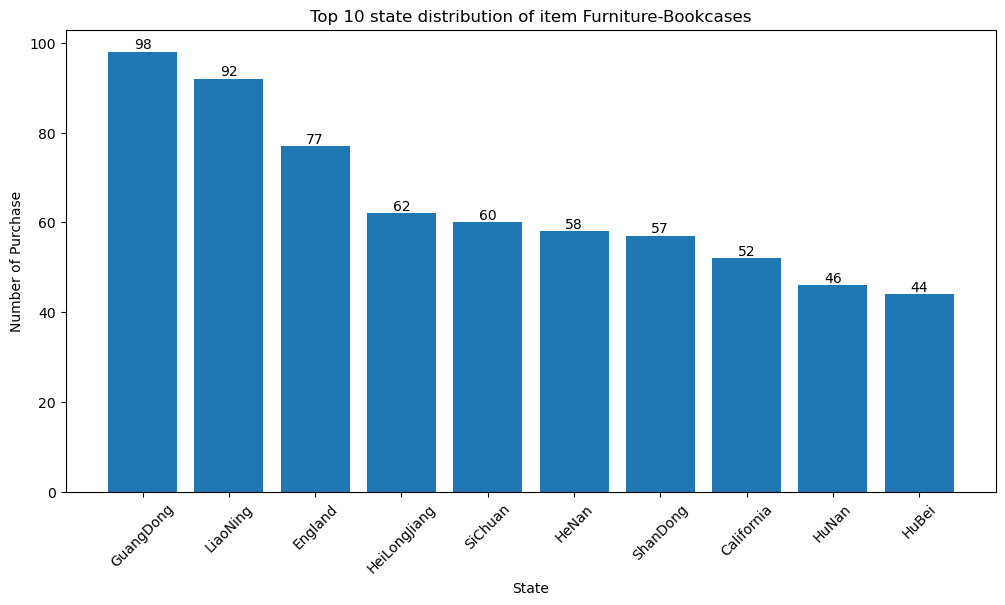

<Figure size 640x480 with 0 Axes>

In [10]:
# analyze the state distribution and save in dictionary in both number and percentage
state_distribution = data['State'].value_counts().to_dict()
state_distribution = {k: (v, round(v / len(data), 2)) for k, v in state_distribution.items()}
# print("The state distribution of item '{}' is: {}".format(y1, state_distribution))
# Extract the number of purchases for the top 10 states
top_10_states = dict(list(state_distribution.items())[:10])
top_10_states_values = [v[0] for v in top_10_states.values()]

# Draw the top 10 states distribution in a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_states.keys(), top_10_states_values)
plt.xlabel('State')
plt.ylabel('Number of Purchase')
plt.title('Top 10 state distribution of item {}'.format(y1))
for i, v in enumerate(top_10_states_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()
# save plot
plt.savefig('./analysis_result_{}/top_10_states_distribution_{}.png'.format(y1, y1))

{'New York City': (29, 0.02), 'ShenZhen': (20, 0.01), 'GuangZhou': (20, 0.01), 'ShangHai': (19, 0.01), 'BeiJing': (19, 0.01), 'ShenYang': (18, 0.01), 'ChengDu': (18, 0.01), 'TianJin': (18, 0.01), 'WuHan': (16, 0.01), 'San Francisco': (16, 0.01)}


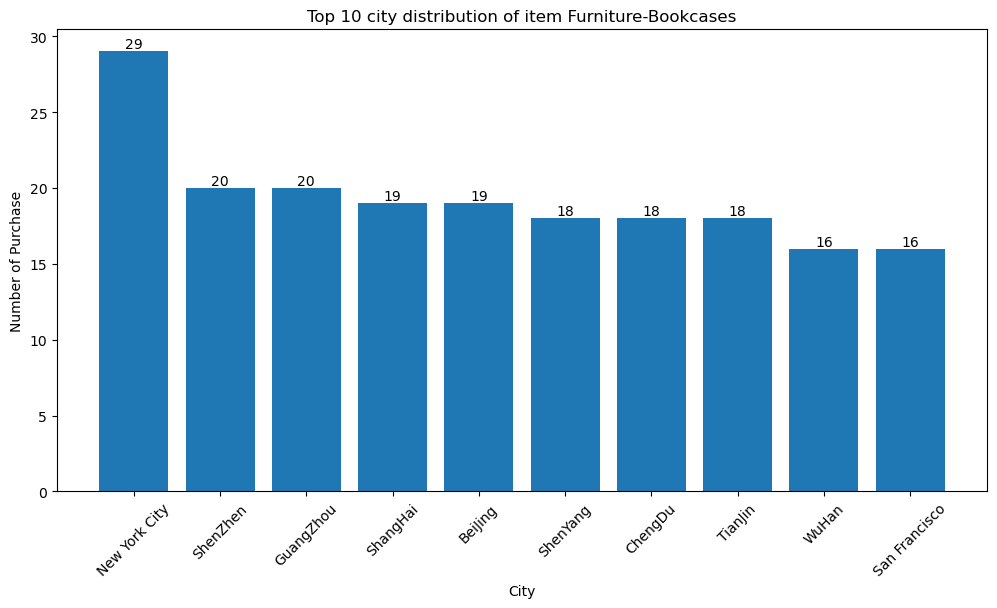

<Figure size 640x480 with 0 Axes>

In [11]:
# analyze the city distribution and save in dictionary in both number and percentage
city_distribution = data['City'].value_counts().to_dict()
city_distribution = {k: (v, round(v / len(data), 2)) for k, v in city_distribution.items()}
# print("The city distribution of item '{}' is: {}".format(y1, city_distribution))
# Extract the number of purchases for the top 10 cities
top_10_cities = dict(list(city_distribution.items())[:10])
top_10_cities_values = [v[0] for v in top_10_cities.values()]
print(top_10_cities)

# Draw the top 10 cities distribution in a bar plot with the value on the top of each bar
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities.keys(), top_10_cities_values)
plt.xlabel('City')
plt.ylabel('Number of Purchase')
plt.title('Top 10 city distribution of item {}'.format(y1))
for i, v in enumerate(top_10_cities_values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()
# save plot
plt.savefig('./analysis_result_{}/top_10_cities_distribution_{}.png'.format(y1, y1))

In [12]:
# save the upper text analysis into a jsonl file
# keep the structure of dictionary
import json
with open('./analysis_result_{}/analysis_result_{}.json'.format(y1, y1), 'w') as f:
    json.dump({
        'segment_distribution': segment_distribution,
        'segment_quantity': segment_quantity,
        'segment_unit_price': segment_unit_price,
        'segment_profit': segment_profit,
        'segment_discount': segment_discount,
        'region_distribution': region_distribution,
        'ship_mode_distribution': ship_mode_distribution,
        'ship_days_distribution': ship_speed_distribution,

        'region_quantity': region_quantity,
        'region_sales': region_sales,
        'region_unit_price': region_unit_price,
        'region_discount': region_discount,
        'region_profit': region_profit,
        'region_gross_profit': region_gross_profit,

        'country_distribution': country_distribution,
        'country_quantity_top_10': country_quantity_top_10,
        'country_sales_top_10': country_sales_top_10,
        'country_unit_price_top_10': country_unit_price_top_10,
        'country_profit_top_10': country_profit_top_10,
        'country_gross_profit_top_10': country_gross_profit_top_10,

        'discount_distribution': discount_distribution,
        'segment_discount_distribution_percentage':segment_discount_distribution_percentage,
        'discount_quantity': discount_quantity,
        'discount_sales': discount_sales,
        'discount_profit': discount_profit,
        'discount_unit_price': discount_unit_price,
        'discount_gross_profit': discount_gross_profit,

        'seasonal_quantity':seasonal_quantity,
        'year_seasonal_quantity':year_seasonal_quantity,
        'seasonal_sales':seasonal_sales,
        'year_seasonal_sales':year_seasonal_sales,
        'sales_ratio_by_quarter':sales_ratio_by_quarter,
        'seasonal_profit':seasonal_profit,
        'year_seasonal_profit':year_seasonal_profit,
        'seasonal_RIO':seasonal_RIO,

        # 'state_distribution': state_distribution,
        # 'city_distribution': city_distribution,
        'top_10_states': top_10_states,
        'top_10_cities': top_10_cities
    }, f, indent=4)

with open('./analysis_result_{}/analysis_result_{}_oneline.json'.format(y1, y1), 'w') as f:
    json.dump({
        'segment_distribution': segment_distribution,
        'segment_quantity': segment_quantity,
        'segment_unit_price': segment_unit_price,
        'segment_profit': segment_profit,
        'segment_discount': segment_discount,
        'region_distribution': region_distribution,
        'ship_mode_distribution': ship_mode_distribution,
        'ship_days_distribution': ship_speed_distribution,

        'region_quantity': region_quantity,
        'region_sales': region_sales,
        'region_unit_price': region_unit_price,
        'region_discount': region_discount,
        'region_profit': region_profit,
        'region_gross_profit': region_gross_profit,

        'country_distribution': country_distribution,
        'country_quantity_top_10': country_quantity_top_10,
        'country_sales_top_10': country_sales_top_10,
        'country_unit_price_top_10': country_unit_price_top_10,
        'country_profit_top_10': country_profit_top_10,
        'country_gross_profit_top_10': country_gross_profit_top_10,

        'discount_distribution': discount_distribution,
        'segment_discount_distribution_percentage':segment_discount_distribution_percentage,
        'discount_quantity': discount_quantity,
        'discount_sales': discount_sales,
        'discount_profit': discount_profit,
        'discount_unit_price': discount_unit_price,
        'discount_gross_profit': discount_gross_profit,
        
        'seasonal_quantity':seasonal_quantity,
        'year_seasonal_quantity':year_seasonal_quantity,
        'seasonal_sales':seasonal_sales,
        'year_seasonal_sales':year_seasonal_sales,
        'sales_ratio_by_quarter':sales_ratio_by_quarter,
        'seasonal_profit':seasonal_profit,
        'year_seasonal_profit':year_seasonal_profit,
        'seasonal_RIO':seasonal_RIO,
        
        # 'state_distribution': state_distribution,
        # 'city_distribution': city_distribution,
        'top_10_states': top_10_states,
        'top_10_cities': top_10_cities
    }, f)